In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor #VIF

In [2]:
housing=pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
housing.shape

(545, 13)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


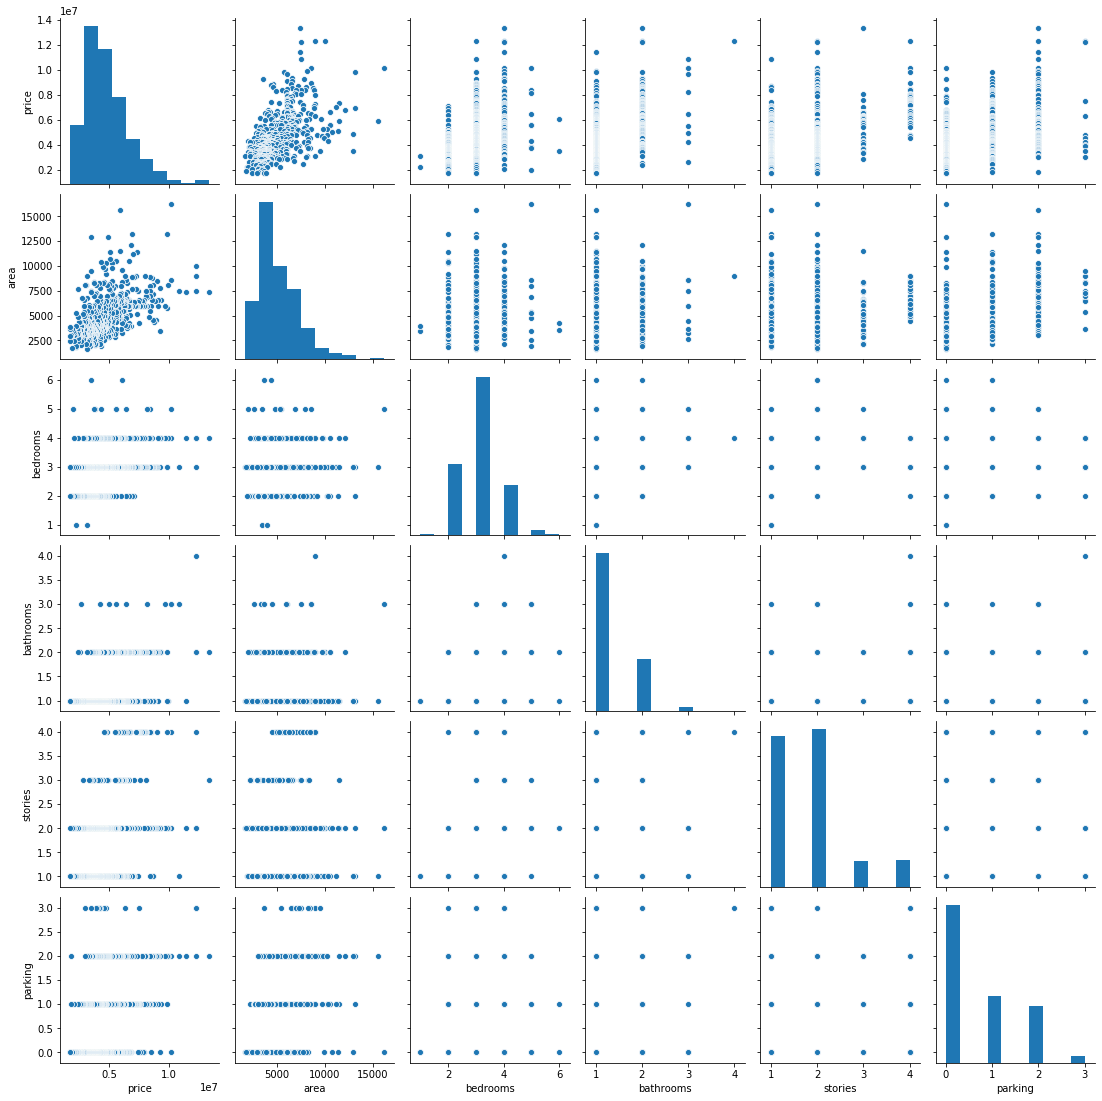

In [6]:
#visualising numeric variables
sb.pairplot(housing)
plt.show()

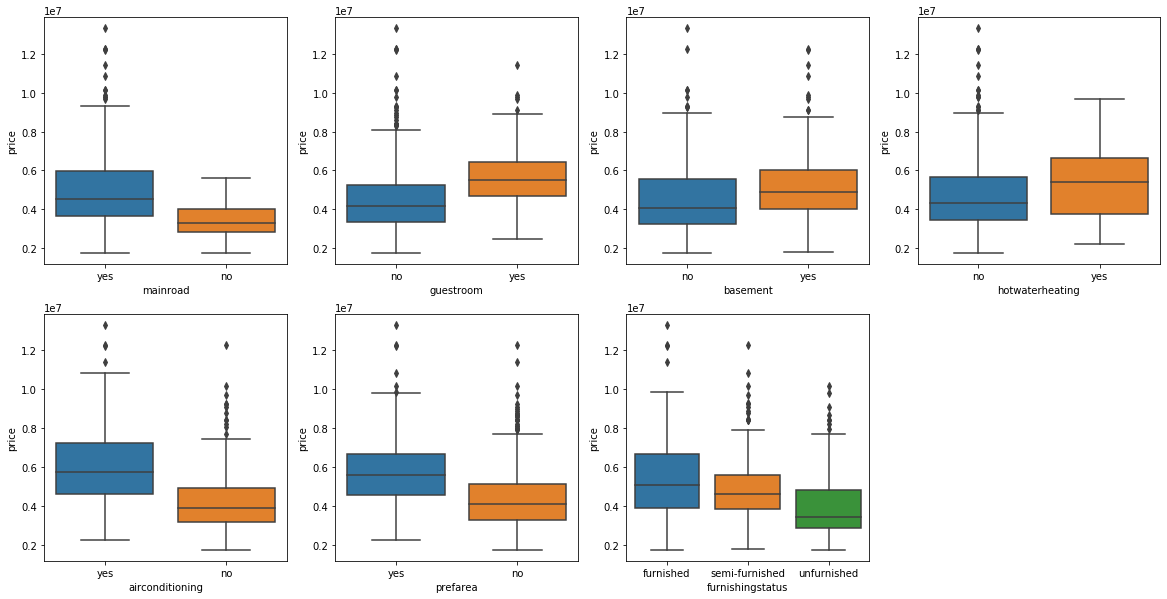

In [7]:
#visualising categorical variables
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sb.boxplot(x="mainroad",y="price",data=housing)
plt.subplot(2,4,2)
sb.boxplot(x="guestroom",y="price",data=housing)
plt.subplot(2,4,3)
sb.boxplot(x="basement",y="price",data=housing)
plt.subplot(2,4,4)
sb.boxplot(x="hotwaterheating",y="price",data=housing)
plt.subplot(2,4,5)
sb.boxplot(x="airconditioning",y="price",data=housing)
plt.subplot(2,4,6)
sb.boxplot(x="prefarea",y="price",data=housing)
plt.subplot(2,4,7)
sb.boxplot(x="furnishingstatus",y="price",data=housing)
plt.show()

In [8]:
#print(housing.mainroad.value_counts())
#print(housing.guestroom.value_counts())
#print(housing.basement.value_counts())
#print(housing.hotwaterheating.value_counts())
#print(housing.airconditioning.value_counts())
#print(housing.prefarea.value_counts())

In [9]:
#converting all yes to 1 and no to 0
#creating a list of all categorical variables

In [10]:
varlist=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]
housing[varlist]=housing[varlist].apply(lambda x: x.map({"yes":1, "no":0,"YES":1,"NO":0}))
housing[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [11]:
# List of variables to map

#varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
#def binary_map(x):
 #   return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
#housing[varlist] = housing[varlist].apply(binary_map)

In [12]:
# Check the housing dataframe now

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [13]:
#dummies for furnishingstatus column
status=pd.get_dummies(housing["furnishingstatus"])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [14]:
#insted of having three dummy variables we should have two 
#droping one column 
status=pd.get_dummies(housing["furnishingstatus"],drop_first=True)
status.head()
# if the house is not semi-furnished and unfurnished it means its furnished

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [15]:
# we have two dataset i.e housing ane firnished we will concatine both
housing=pd.concat([housing,status],axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [16]:
#as we see furnishingstatus column is in data set , we will drop it
housing=housing.drop(["furnishingstatus"],axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [17]:
# spliting the data into train and test
df_train,df_test=train_test_split(housing,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


In [18]:
#rescalling
#1- minmax scalling(x-xmin)/(xmax-xmin)
#2- standardazation(mean-0,sigma-1)

In [19]:
# intanciate an object
scaler=MinMaxScaler()
#we want to perform modling on numeric vars
# we create a list 
num_vars=["area","bedrooms","bathrooms" ,"stories","parking","price"]
# we are fitting the data
#fit()-xmin ,xmax
#transform()-(x-xmin)/(xmax-xmin)
#fit_transform()
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

C:\Users\SIDDHESH\anaconda3\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\SIDDHESH\anaconda3\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


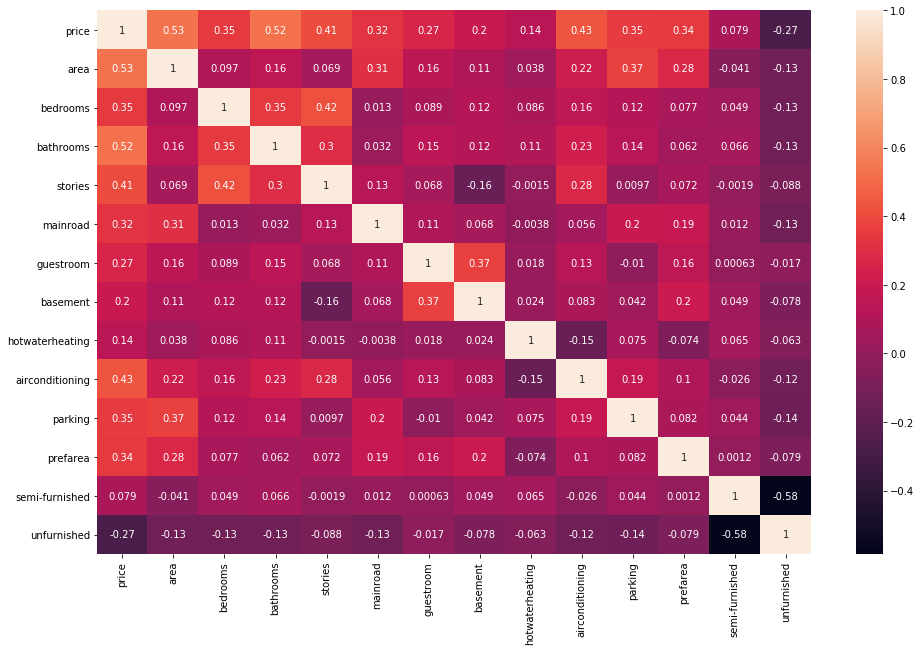

In [20]:
# plotting heatmap
plt.figure(figsize=(16,10))
sb.heatmap(df_train.corr(),annot=True)
plt.show()

## Building model one
    -adding variables one by one
    -using stats model

In [21]:
#buliding model
#we data x_train and y_train from df_train
Y_train=df_train.pop("price")
X_train=df_train

In [22]:
#usign stats model we will build a model
x_train_sm=sm.add_constant(X_train["area"])
#create first model
lr=sm.OLS(Y_train,x_train_sm)
#fit model
lr_model=lr.fit()
#params
lr_model.params# as the area goes up the price go up

const    0.126894
area     0.462192
dtype: float64

In [23]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           3.15e-29
Time:                        22:47:32   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#R-squared is 0.283 that means that about 28% of variance is explained by area variable

In [25]:
#add anothe variable 
x_train_sm=X_train[["area","bathrooms"]]
x_train_sm=sm.add_constant(x_train_sm)
#create a model
lr=sm.OLS(Y_train,x_train_sm)
#fit
lr_model=lr.fit()
#params
lr_model.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [26]:
lr_model.summary()# p value is 0.00 that means the coefficents are statiscally similar
# the value of R_squared is 0.480 that is 48% the we can say that 48% of variance is explained by both vars

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           2.51e-54
Time:                        22:47:33   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# add another variable variable 
x_train_sm=X_train[["area","bathrooms","bedrooms"]]
#add constant
x_train_sm=sm.add_constant(x_train_sm)
#create model
lr=sm.OLS(Y_train,x_train_sm)
#fit
lr_model=lr.fit()
#params
lr_model.params

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

In [28]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           3.12e-57
Time:                        22:47:33   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Build model two
- adding all variables
- removing one by one

In [29]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [30]:
#Add constant
x_train_sm=sm.add_constant(X_train)

In [31]:
#create model
lr=sm.OLS(Y_train,x_train_sm)
#fit model
lr_model=lr.fit()
#params
lr_model.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [32]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           8.83e-83
Time:                        22:47:34   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#to remove an variable 
#we must see significance (P-value) of variable and VIF(1/1-r^2)

In [34]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i)for i in range(X_train.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


In [35]:
# which variable we should drop 
#we should drop
#-high p-value & high VIF(if this condition satisfy we drop the variable)
#- high and low
#   high -p & low VIF (in these case we remove these variables)
#   low -p & high VIF (removes these after the onces above)
# -low p & low VIF

In [36]:
X=X_train.drop("semi-furnished",axis=1)

In [37]:
# add constant
x_train_sm=sm.add_constant(X)
#creat model
lr=sm.OLS(Y_train,x_train_sm)
#fit
lr_model=lr.fit()
#params
lr_model.params

const              0.020740
area               0.234404
bedrooms           0.046710
bathrooms          0.190876
stories            0.108475
mainroad           0.050401
guestroom          0.030447
basement           0.021605
hotwaterheating    0.084890
airconditioning    0.066803
parking            0.060761
prefarea           0.059419
unfurnished       -0.031594
dtype: float64

In [38]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           1.07e-83
Time:                        22:47:36   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#also look at VIF

In [40]:
vif=pd.DataFrame()
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [47]:
#droping bedrooms have high p value and high VIF
X=X_train.drop("bedrooms",axis=1)

In [48]:
# add constant
x_train_sm=sm.add_constant(X)
#creat model
lr=sm.OLS(Y_train,x_train_sm)
#fit
lr_model=lr.fit()
#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           2.35e-83
Time:                        22:49:26   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0351      0.017      2.032      0.043       0.001       0.069
area                0.2350      0.030      7.799      0.000       0.176       0.294
bathrooms           0.1964      0.022      9.114      0.000       0.154       0.239
stories             0.1178      0.018      6.643      0.000       0.083       0.153
mainroad            0.0488      0.014      3.419      0.001       0.021       0.077
guestroom           0.0301      0.014      2.207      0.028       0.003       0.057
basement            0.0239      0.011      2.179      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.007      0.000       0.044       0.129
airconditioning     0.0666      0.011      5.870      0.000       0.044       0.089
parking             0.0629      0.018      3.495      0.001       0.027       0.098
prefarea            0.0597      0.012      5.055      0.000       0.036       0.083
semi-furnished      0.0008      0.012      0.067      0.947      -0.022       0.024
unfurnished        -0.0318      0.013     -2.504      0.013      -0.057      -0.007
==============================================================================
Omnibus:                       97.809   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.485
Skew:                           1.131   Prob(JB):                     1.27e-71
Kurtosis:                       6.930   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif=pd.DataFrame()
vif["Features"]=Z.columns
vif["VIF"]=[variance_inflation_factor(Z.values,i)for i in range(Z.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,mainroad,5.53
0,area,4.55
2,stories,2.24
8,parking,2.11
10,semi-furnished,1.97
5,basement,1.90
7,airconditioning,1.77
11,unfurnished,1.62
1,bathrooms,1.61
9,prefarea,1.51


In [44]:
#X=X_train.drop("mainroad",axis=1)

In [45]:
# add constant
#x_train_sm=sm.add_constant(X)
#creat model
#lr=sm.OLS(Y_train,x_train_sm)
#fit
#lr_model=lr.fit()
#summary
#lr_model.summary()

In [46]:
#vif=pd.DataFrame()
#vif["Features"]=X.columns
#vif["VIF"]=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
#vif["VIF"]=round(vif["VIF"],2)
#vif=vif.sort_values(by="VIF",ascending=False)
#vif

In [49]:
# Reciduals analysis